In [190]:
url='https://bit.ly/3kXTdox'

In [211]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import matplotlib.pyplot as plt

data= datasets.load_iris()
df= pd.DataFrame(data.data, columns = data.feature_names)


In [192]:
df.head(5)#to show first 5 rows in the the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [194]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## EDA

In [195]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: ylabel='sepal length (cm)'>

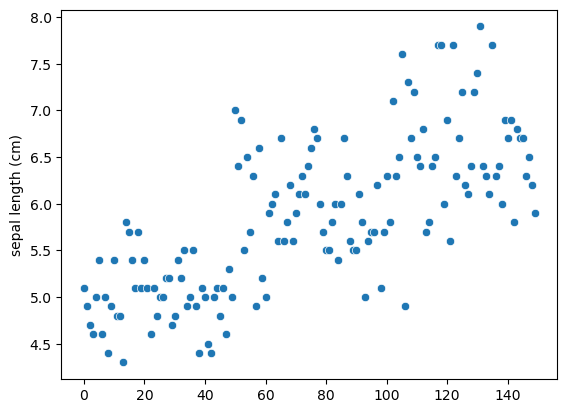

In [196]:
#Visualization
sns.scatterplot(df['sepal length (cm)']) #sepal length has three groups


<Axes: ylabel='sepal width (cm)'>

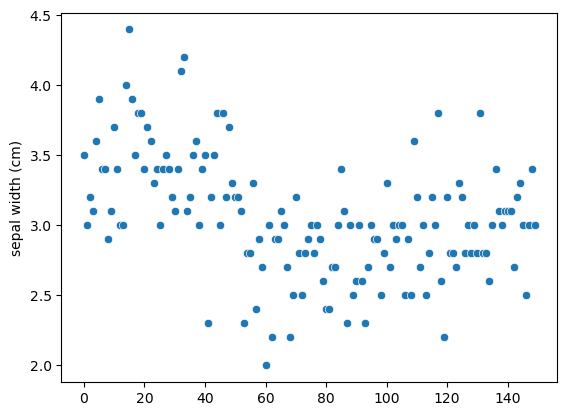

In [197]:
sns.scatterplot(df['sepal width (cm)'])

<Axes: ylabel='petal width (cm)'>

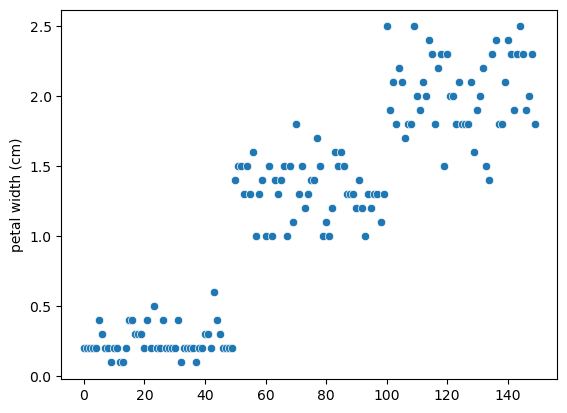

In [198]:
sns.scatterplot(df['petal width (cm)'])# petal width has three groups


<Axes: ylabel='petal length (cm)'>

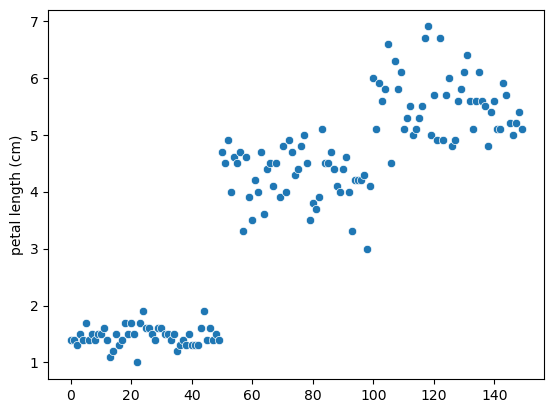

In [199]:
sns.scatterplot(df['petal length (cm)']) # petal length also has three groups


In [200]:
from sklearn.cluster import KMeans
x=df.iloc[:,[0,1,2,3]].values


In [201]:
kmeans=KMeans(n_clusters=3,init = 'k-means++',max_iter = 50, n_init = 10, random_state = 0)

In [202]:
kmeans.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [203]:
df["label"]=kmeans.labels_

<Axes: >

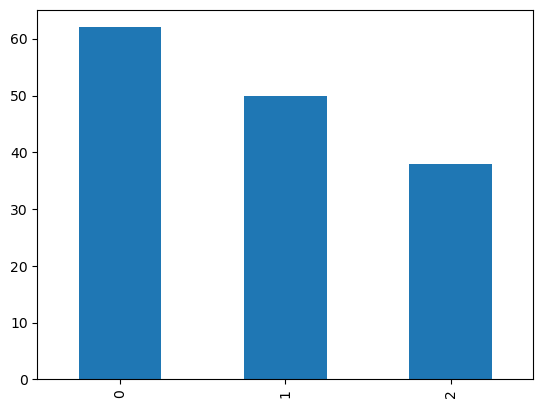

In [204]:
df["label"].value_counts().plot(kind="bar")

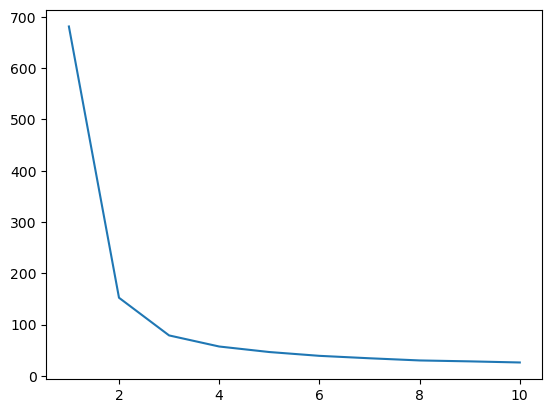

In [205]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [206]:
#data has 3 number of clusters and predicted 100 percent

In [207]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0) #n=3
y_pred=kmeans.fit_predict(x)
kmeans.labels_.shape

(150,)

In [208]:
#3 type of clusters found 
set(y_pred)

{0, 1, 2}

In [209]:
pd.DataFrame(y_pred).value_counts()

0    62
1    50
2    38
dtype: int64

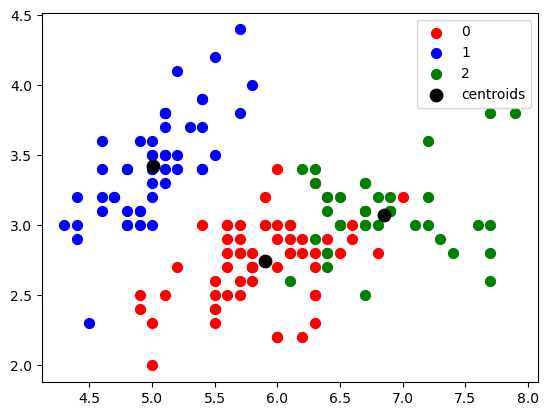

In [210]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=50,c='red',label="0")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=50,c='blue',label="1")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=50,c='green',label="2")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c="black",label="centroids")
plt.legend()